In [204]:
%pylab inline
pylab.rcParams['figure.figsize'] = 8,5

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [193]:
# This script will parse a CSV file taken from the Spectre Simulations and extract out the Early Voltage
import os
import sys
from scipy.optimize import leastsq
from pylab import *
import csv

In [132]:
# This function will read a csv file and save the data in a predetermined format
def readFile(filename):
    Xdata = []
    Ydata = []
    with open(filename) as fn:
        reader = csv.reader(fn)
        for i, row in enumerate(reader):
            if i>0:
                Xdata.append(double(row[0]))
                Ydata.append([])
                if (len(row)%2 == 0):
                    for Vgindex in range(len(row)/2):
#                        print "adding element to Vgindex", Vgindex, "\t", row[2*Vgindex+1]
                        Ydata[i-1].append( double(row[2*Vgindex+1]) )
                else:
                    print "Error: Not an even number of entries in this row; not a completely paired set of data points"
    return array(Xdata), array(Ydata)

In [192]:
def linFit(x, m, b):
    return m*x + b

def linFitErr(x0s, xData, yData):
    (m,b) = x0s
    return yData - linFit(xData, m, b)

In [174]:
def calcEV(m, b):
    return -b/m

In [303]:
def plotData(data, xlims=(0,1), ylims=(0,0.0001)):
    Xs, Ys = data
    numCols = shape(Ys)[1]
    for i in range(numCols):
        plot(Xs, Ys.T[i], '-', color=(1.*i/numCols, 0, 0))
    xlabel(r'$V_{ds}$')
    ylabel(r'$I_d$')

    
def plotTheory(Vds, Ms, Bs):
    #print "Slopes: ", Ms
    #print "Intercepts: ", Bs
    for i in range(len(Ms)):
        thIds = linFit(Vds, Ms[i], Bs[i])
        plot(Vds, thIds, "b.")
        thLineXs = arange(-60, max(Vds), 0.01)
        thIdLine = linFit(thLineXs, Ms[i], Bs[i])
        plot(thLineXs, thIdLine, "b--")
    xlims = [min(thLineXs)*1.1, max(Vds)]
    ylims = [0, max(thIdLine)*1.1]
    xlim(xlims)
    ylim(ylims)
        
def parseFile(data):
    Xs, Ys = data
    ms = list()
    bs = list()
    numCols = shape(Ys)[1]
    for i in range(numCols):
        popt,pcov = leastsq(linFitErr, (0.00002, 0.00005), args=(Xs, Ys.T[i]))
        #print popt
        ms.append(popt[0])
        bs.append(popt[1])
    return array(ms), array(bs)

In [277]:
def getEarlyVoltages(fileName, threshold):
    origVds, origIds = readFile(fileName)

    mask = origVds>threshold
    Vds = origVds[mask]
    Ids = origIds[mask]

    Ms, Bs = parseFile((Vds,Ids))
    EarlyVoltages = calcEV(Ms, Bs)
    print "Early Voltages:\t", EarlyVoltages
    
    return (origVds, origIds, Vds, Ids, EarlyVoltages, Ms, Bs)

In [258]:
folderRoot = "/home/noza/work/Braindrop/CDB/BDTests/Test_NFET/IdsvsVdsSim/"
threshold = 1.5

In [248]:
paramFileName = folderRoot + "ParamAnalysisVals_VgSweep.csv"
with open(paramFileName) as pfn:
    reader = csv.reader(pfn)
    data = list()
    for i, row in enumerate(reader):
        data.append(double(row[1:]))
Vgs = data[0]
print "Vg Vals:", Vgs

Vg Vals: [ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2. ]


Early Voltages:	[  1.4657414    1.32367137   1.05102917  -0.24408122  -2.43501842
  -4.75129027  -6.80222222  -8.66008213 -10.22915059 -11.38768144
 -12.08284741]
Early Voltages:	[  1.52059542  -7.61791797  -9.73322822  -8.86275993  -7.31115442
  -8.25625496 -10.26722448 -12.36701628 -14.0396071  -14.9858791
 -14.94371882]
Early Voltages:	[  1.56937103   0.60099295  -1.26173518  -1.48649553  -6.06812522
 -12.20935261 -20.27054673 -30.82600051 -41.35320076 -49.03233044
 -53.05483549]
Early Voltages:	[  1.55348004e+00   1.54885817e-02  -1.13321624e+01  -1.17542815e+01
  -1.67889618e+01  -2.38226926e+01  -3.12837466e+01  -3.83320656e+01
  -4.40732956e+01  -4.71737317e+01  -4.64116552e+01]


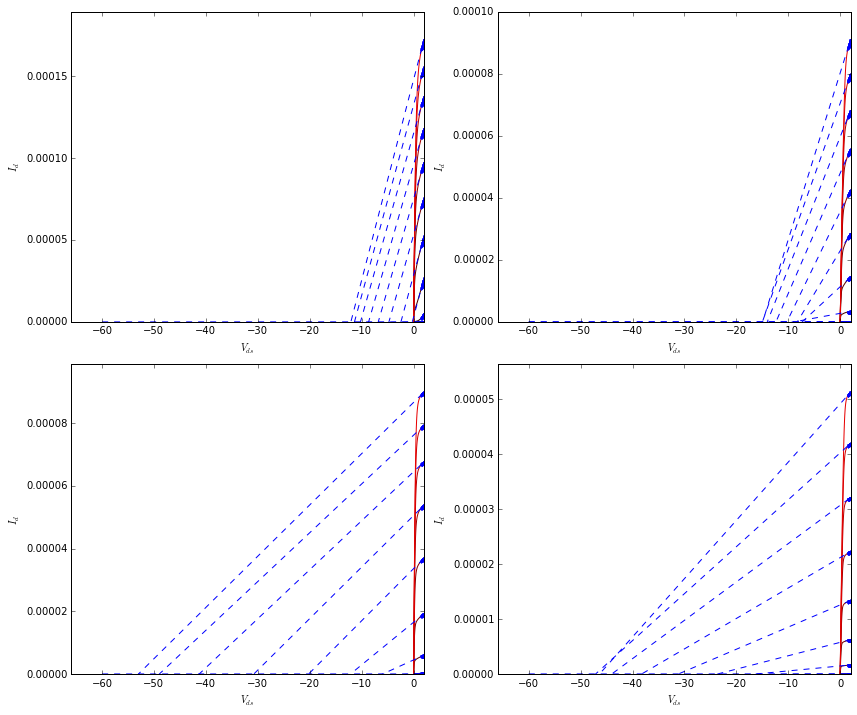

In [304]:
fileName = folderRoot + "NFET_1L_IdsVdsCurve.csv"
fileName3L = folderRoot + "NFET_3L_IdsVdsCurve.csv"
fileName_eg3L = folderRoot + "NFET_eg3L_IdsVdsCurve.csv"
fileName_eg1L = folderRoot + "NFET_eg1L_IdsVdsCurve.csv"

figsize(12,10)
subplot(2,2,1)
origVds, origIds, Vds, Ids, EarlyVoltages, Ms, Bs = getEarlyVoltages(fileName, threshold)
plotData((origVds, origIds), xlims, ylims)
plotTheory(Vds, Ms, Bs)

subplot(2,2,2)
origVds, origIds, Vds, Ids, EarlyVoltages, Ms, Bs = getEarlyVoltages(fileName3L, threshold)
plotData((origVds, origIds), xlims, ylims)
plotTheory(Vds, Ms, Bs)

subplot(2,2,3)
origVds, origIds, Vds, Ids, EarlyVoltages, Ms, Bs = getEarlyVoltages(fileName_eg1L, threshold)
plotData((origVds, origIds), xlims, ylims)
plotTheory(Vds, Ms, Bs)

subplot(2,2,4)
origVds, origIds, Vds, Ids, EarlyVoltages, Ms, Bs = getEarlyVoltages(fileName_eg3L, threshold)
plotData((origVds, origIds), xlims, ylims)
plotTheory(Vds, Ms, Bs)

tight_layout()
show()